# Dataset Inspection: OpenML Datasets

This notebook inspects three datasets from OpenML:
1. **German Credit (ID: 31)** - credit-german
2. **Adult (ID: 179)** - adult
3. **COMPAS (ID: 44162)** - compas

We'll examine their structure, features, target variables, and provide insights
.



In [15]:
import openml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")


Libraries imported successfully!


## Helper Function to Inspect Datasets


In [16]:
def inspect_dataset(dataset_id, dataset_name):
    """
    Comprehensive inspection of an OpenML dataset.
    """
    print("=" * 80)
    print(f"DATASET: {dataset_name} (ID: {dataset_id})")
    print("=" * 80)
    
    # Load dataset
    dataset = openml.datasets.get_dataset(dataset_id)
    
    # Get basic info
    print(f"\n📊 Dataset Information:")
    print(f"   Name: {dataset.name}")
    print(f"   Version: {dataset.version}")
    print(f"   Description: {dataset.description[:200]}..." if len(dataset.description) > 200 else f"   Description: {dataset.description}")
    print(f"   URL: {dataset.url}")
    
    # Get data
    X, y, categorical_indicator, feature_names = dataset.get_data(
        dataset_format="array", target=dataset.default_target_attribute
    )
    
    print(f"\n📐 Dataset Shape:")
    print(f"   Samples: {X.shape[0]:,}")
    print(f"   Features: {X.shape[1]}")
    print(f"   Target variable: {dataset.default_target_attribute}")
    
    # Target distribution
    print(f"\n🎯 Target Variable Distribution:")
    unique_targets, counts = np.unique(y, return_counts=True)
    target_dist = dict(zip(unique_targets, counts))
    for target, count in target_dist.items():
        percentage = (count / len(y)) * 100
        print(f"   {target}: {count:,} ({percentage:.2f}%)")
    
    # Feature information
    print(f"\n📋 Features:")
    categorical_features = []
    numerical_features = []
    
    for i, (name, is_categorical) in enumerate(zip(feature_names, categorical_indicator)):
        feature_type = "Categorical" if is_categorical else "Numerical"
        unique_vals = len(np.unique(X[:, i]))
        missing = np.isnan(X[:, i]).sum() if not is_categorical else 0
        
        if is_categorical:
            categorical_features.append(i)
            print(f"   [{i:2d}] {name:30s} | {feature_type:12s} | Unique: {unique_vals:3d} | Missing: {missing:5d}")
        else:
            numerical_features.append(i)
            mean_val = np.nanmean(X[:, i])
            std_val = np.nanstd(X[:, i])
            print(f"   [{i:2d}] {name:30s} | {feature_type:12s} | Mean: {mean_val:8.2f} | Std: {std_val:8.2f} | Missing: {missing:5d}")
    
    print(f"\n📊 Summary:")
    print(f"   Categorical features: {len(categorical_features)}")
    print(f"   Numerical features: {len(numerical_features)}")
    print(f"   Total missing values: {np.isnan(X).sum():,}")
    
    # Create DataFrame for easier analysis
    df = pd.DataFrame(X, columns=feature_names)
    df['target'] = y
    
    # Show sample data
    print(f"\n🔍 Sample Data (first 5 rows):")
    print(df.head().to_string())
    
    # Show categorical feature value distributions
    if categorical_features:
        print(f"\n📊 Categorical Feature Value Distributions:")
        for idx in categorical_features[:5]:  # Show first 5 categorical features
            feature_name = feature_names[idx]
            value_counts = Counter(X[:, idx])
            print(f"\n   {feature_name}:")
            for val, count in value_counts.most_common(10):
                percentage = (count / len(X)) * 100
                print(f"      {val}: {count:,} ({percentage:.2f}%)")
    
    return dataset, X, y, categorical_indicator, feature_names, df


## 1. German Credit Dataset (ID: 31)


In [17]:
dataset_31, X_31, y_31, cat_31, feat_names_31, df_31 = inspect_dataset(31, "German Credit")


DATASET: German Credit (ID: 31)

📊 Dataset Information:
   Name: credit-g
   Version: 1
   Description: **Author**: Dr. Hans Hofmann  
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)) - 1994    
**Please cite**: [UCI](https://archive.ics.uci.edu/ml/citation_policy....
   URL: https://api.openml.org/data/v1/download/31/credit-g.arff

📐 Dataset Shape:
   Samples: 1,000
   Features: 20
   Target variable: class

🎯 Target Variable Distribution:
   0: 700 (70.00%)
   1: 300 (30.00%)

📋 Features:
   [ 0] checking_status                | Categorical  | Unique:   4 | Missing:     0
   [ 1] duration                       | Numerical    | Mean:    20.90 | Std:    12.05 | Missing:     0
   [ 2] credit_history                 | Categorical  | Unique:   5 | Missing:     0
   [ 3] purpose                        | Categorical  | Unique:  10 | Missing:     0
   [ 4] credit_amount                  | Numerical    | Mean:  3271.26 | Std:  2821.33 | Missing:     0
  

## 2. Adult Dataset (ID: 179)

In [18]:
dataset_179, X_179, y_179, cat_179, feat_names_179, df_179 = inspect_dataset(179, "Adult")


DATASET: Adult (ID: 179)

📊 Dataset Information:
   Name: adult
   Version: 1
   Description: **Author**: Ronny Kohavi and Barry Becker  
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/Adult) - 1996-05-01  
**Please cite**: Ron Kohavi, "Scaling Up the Accuracy of Naive-Bayes Classif...
   URL: https://openml.org/data/v1/download/3608/adult.arff

📐 Dataset Shape:
   Samples: 48,842
   Features: 14
   Target variable: class

🎯 Target Variable Distribution:
   0: 11,687 (23.93%)
   1: 37,155 (76.07%)

📋 Features:
   [ 0] age                            | Categorical  | Unique:   5 | Missing:     0
   [ 1] workclass                      | Categorical  | Unique:   9 | Missing:     0
   [ 2] fnlwgt                         | Numerical    | Mean: 189664.14 | Std: 105602.95 | Missing:     0
   [ 3] education                      | Categorical  | Unique:  16 | Missing:     0
   [ 4] education-num                  | Numerical    | Mean:    10.08 | Std:     2.57 | Missing:     0
   [ 5] 

## 3. COMPAS Dataset (ID: 44162)


In [19]:
dataset_44162, X_44162, y_44162, cat_44162, feat_names_44162, df_44162 = inspect_dataset(44162, "COMPAS")


DATASET: COMPAS (ID: 44162)

📊 Dataset Information:
   Name: compass
   Version: 3
   Description: Dataset used in the tabular data benchmark https://github.com/LeoGrin/tabular-benchmark, transformed in the same way. This dataset belongs to the "classification on categorical and numerical features"...
   URL: https://openml.org/data/v1/download/22103287/compass.arff

📐 Dataset Shape:
   Samples: 16,644
   Features: 17
   Target variable: is_recid

🎯 Target Variable Distribution:
   0: 8,322 (50.00%)
   1: 8,322 (50.00%)

📋 Features:
   [ 0] sex                            | Categorical  | Unique:   2 | Missing:     0
   [ 1] age                            | Numerical    | Mean:    33.80 | Std:    11.53 | Missing:     0
   [ 2] age_cat                        | Categorical  | Unique:   3 | Missing:     0
   [ 3] race                           | Categorical  | Unique:   6 | Missing:     0
   [ 4] juv_fel_count                  | Numerical    | Mean:     0.08 | Std:     0.48 | Missing:     

## Complete Feature Summary with Values

Below is a comprehensive summary of all features and their possible values for each dataset.


In [25]:
def get_feature_values_summary(dataset_id, X, feature_names, categorical_indicator, dataset_name):
    """Get complete feature summary with all possible values."""
    print("=" * 100)
    print(f"{dataset_name} - Complete Feature Summary")
    print("=" * 100)
    
    # Try to get DataFrame format for actual category names
    try:
        dataset = openml.datasets.get_dataset(dataset_id)
        X_df, _, _, _ = dataset.get_data(
            dataset_format="dataframe", target=dataset.default_target_attribute
        )
        use_df = True
    except Exception as e:
        use_df = False
        X_df = None
    
    for i, (name, is_cat) in enumerate(zip(feature_names, categorical_indicator)):
        feature_type = "Categorical" if is_cat else "Numerical"
        feature_values = X[:, i]
        unique_vals, counts = np.unique(feature_values, return_counts=True)
        
        print(f"\n[{i:2d}] {name}")
        print(f"     Type: {feature_type}")
        
        if is_cat:
            print(f"     Unique values: {len(unique_vals)}")
            if use_df and name in X_df.columns:
                # Get actual category names
                value_counts = X_df[name].value_counts().sort_index()
                print(f"     Possible values:")
                for val, count in value_counts.items():
                    pct = (count / len(X_df)) * 100
                    print(f"       '{val}': {count:,} ({pct:.2f}%)")
            else:
                print(f"     Possible values (numeric encoding):")
                for val, count in zip(unique_vals, counts):
                    pct = (count / len(X)) * 100
                    print(f"       {val}: {count:,} ({pct:.2f}%)")
        else:
            # Numerical feature
            mean_val = np.nanmean(feature_values)
            std_val = np.nanstd(feature_values)
            min_val = np.nanmin(feature_values)
            max_val = np.nanmax(feature_values)
            print(f"     Range: [{min_val:.2f}, {max_val:.2f}]")
            print(f"     Mean: {mean_val:.2f}, Std: {std_val:.2f}")
            print(f"     Unique values: {len(unique_vals)}")
    
    print("\n" + "=" * 100)

# Get summaries for all three datasets
get_feature_values_summary(31, X_31, feat_names_31, cat_31, "GERMAN CREDIT (ID: 31)")
get_feature_values_summary(179, X_179, feat_names_179, cat_179, "ADULT (ID: 179)")
get_feature_values_summary(44162, X_44162, feat_names_44162, cat_44162, "COMPAS (ID: 44162)")


GERMAN CREDIT (ID: 31) - Complete Feature Summary

[ 0] checking_status
     Type: Categorical
     Unique values: 4
     Possible values:
       '<0': 274 (27.40%)
       '0<=X<200': 269 (26.90%)
       '>=200': 63 (6.30%)
       'no checking': 394 (39.40%)

[ 1] duration
     Type: Numerical
     Range: [4.00, 72.00]
     Mean: 20.90, Std: 12.05
     Unique values: 33

[ 2] credit_history
     Type: Categorical
     Unique values: 5
     Possible values:
       'no credits/all paid': 40 (4.00%)
       'all paid': 49 (4.90%)
       'existing paid': 530 (53.00%)
       'delayed previously': 88 (8.80%)
       'critical/other existing credit': 293 (29.30%)

[ 3] purpose
     Type: Categorical
     Unique values: 10
     Possible values:
       'new car': 234 (23.40%)
       'used car': 103 (10.30%)
       'furniture/equipment': 181 (18.10%)
       'radio/tv': 280 (28.00%)
       'domestic appliance': 12 (1.20%)
       'repairs': 22 (2.20%)
       'education': 50 (5.00%)
       'vacation'

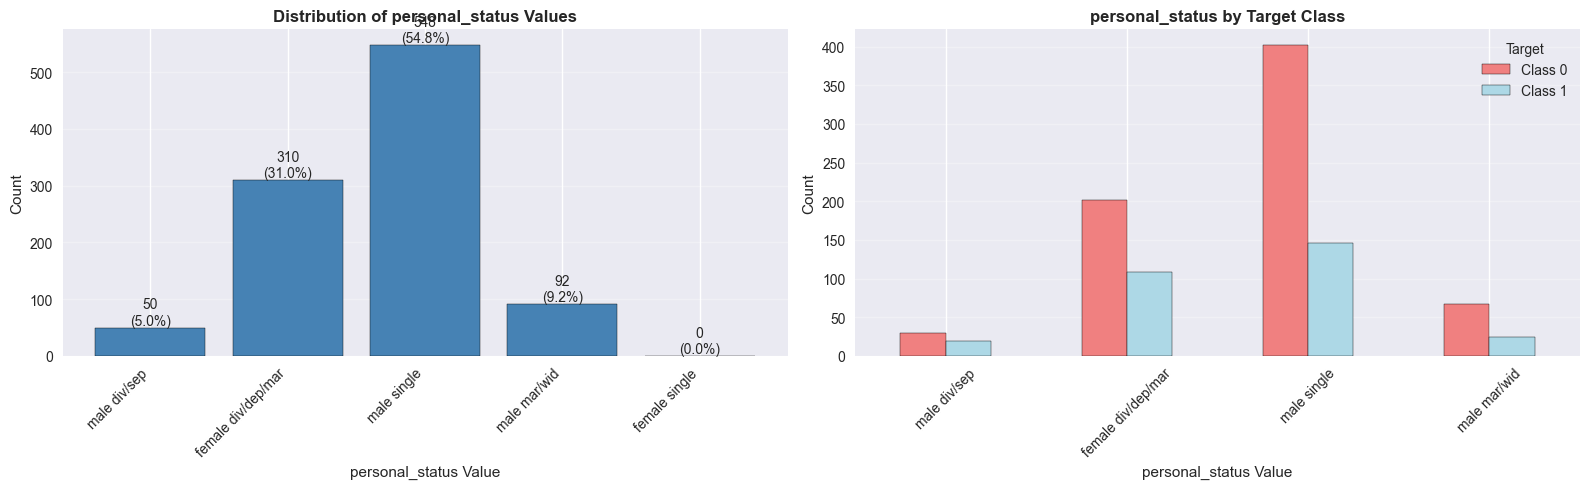


INTERPRETATION FOR SPOUSE CONSISTENCY

For spouse consistency, feature 8 (personal_status) contains gender and marital status information.

The categories typically represent combinations of:
- Gender (male/female)
- Marital status (single, married, divorced, widowed)

To use this for spouse consistency, you would need to:
1. Identify which values represent different genders (check the actual values above)
2. Create "spouse pairs" by flipping between male/female categories
   while keeping other attributes (like marital status) similar

If the values match the UCI encoding:
- A13 (male, single) ↔ A92 (female, single)
- A14 (male, married) ↔ A94 (female, married)
- A11 (male, divorced) ↔ A12 (female, divorced/married)

⚠️  IMPORTANT: Verify the actual category values and their meanings from the output above.
The OpenML version may use numeric encodings (0, 1, 2, 3) instead of letter codes (A11, A12, etc.).

This is more complex than a simple binary flip (like sex), requiring
custom log

In [ ]:
# Visualize the distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot 1: Value distribution
if 'X_df' in locals():
    value_counts = X_df['personal_status'].value_counts().sort_index()
    axes[0].bar(range(len(value_counts)), value_counts.values, color='steelblue', edgecolor='black')
    axes[0].set_xticks(range(len(value_counts)))
    axes[0].set_xticklabels(value_counts.index, rotation=45, ha='right')
    axes[0].set_title('Distribution of personal_status Values', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('personal_status Value')
    axes[0].set_ylabel('Count')
    axes[0].grid(axis='y', alpha=0.3)
    
    # Add count labels on bars
    for i, v in enumerate(value_counts.values):
        axes[0].text(i, v, f'{v}\n({v/len(X_df)*100:.1f}%)', ha='center', va='bottom')
else:
    # Use numeric values
    axes[0].bar(range(len(unique_vals)), counts, color='steelblue', edgecolor='black')
    axes[0].set_xticks(range(len(unique_vals)))
    axes[0].set_xticklabels([str(v) for v in unique_vals], rotation=45, ha='right')
    axes[0].set_title('Distribution of personal_status Values', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('personal_status Value')
    axes[0].set_ylabel('Count')
    axes[0].grid(axis='y', alpha=0.3)
    
    for i, v in enumerate(counts):
        axes[0].text(i, v, f'{v}\n({v/len(X_31)*100:.1f}%)', ha='center', va='bottom')

# Plot 2: Distribution by target class
if 'X_df' in locals() and 'y_df' in locals():
    crosstab = pd.crosstab(X_df['personal_status'], y_df)
    crosstab.plot(kind='bar', ax=axes[1], color=['lightcoral', 'lightblue'], edgecolor='black')
    axes[1].set_title('personal_status by Target Class', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('personal_status Value')
    axes[1].set_ylabel('Count')
    axes[1].legend(['Class 0', 'Class 1'], title='Target')
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].grid(axis='y', alpha=0.3)
else:
    # Use numeric values
    for val in unique_vals:
        mask = feature_8_values == val
        target_dist = pd.Series(y_31[mask]).value_counts().sort_index()
        axes[1].bar([f"{val}\nClass {t}" for t in target_dist.index], 
                    target_dist.values, 
                    color=['lightcoral' if t == 0 else 'lightblue' for t in target_dist.index],
                    edgecolor='black')
    axes[1].set_title('personal_status by Target Class', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('personal_status Value')
    axes[1].set_ylabel('Count')
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("INTERPRETATION FOR SPOUSE CONSISTENCY")
print("="*80)
print("""
For spouse consistency, feature 8 (personal_status) contains gender and marital status information.

The categories typically represent combinations of:
- Gender (male/female)
- Marital status (single, married, divorced, widowed)

To use this for spouse consistency, you would need to:
1. Identify which values represent different genders (check the actual values above)
2. Create "spouse pairs" by flipping between male/female categories
   while keeping other attributes (like marital status) similar

If the values match the UCI encoding:
- A13 (male, single) ↔ A92 (female, single)
- A14 (male, married) ↔ A94 (female, married)
- A11 (male, divorced) ↔ A12 (female, divorced/married)

⚠️  IMPORTANT: Verify the actual category values and their meanings from the output above.
The OpenML version may use numeric encodings (0, 1, 2, 3) instead of letter codes (A11, A12, etc.).

This is more complex than a simple binary flip (like sex), requiring
custom logic to pair appropriate categories based on the actual encoding used.
""")


## Complete Feature Values Reference

This section provides a comprehensive reference of all features and their possible values for each dataset.


In [22]:
def print_all_feature_values(dataset_id, X, feature_names, categorical_indicator, dataset_name):
    """Print all features and their possible values."""
    print("\n" + "=" * 100)
    print(f"{dataset_name}")
    print("=" * 100)
    
    # Try to get DataFrame format for actual category names
    try:
        dataset = openml.datasets.get_dataset(dataset_id)
        X_df, _, _, _ = dataset.get_data(
            dataset_format="dataframe", target=dataset.default_target_attribute
        )
        use_df = True
    except:
        use_df = False
        X_df = None
    
    for i, (name, is_cat) in enumerate(zip(feature_names, categorical_indicator)):
        feature_type = "Categorical" if is_cat else "Numerical"
        feature_values = X[:, i]
        unique_vals, counts = np.unique(feature_values, return_counts=True)
        
        print(f"\n[{i:2d}] {name} ({feature_type})")
        
        if is_cat:
            if use_df and name in X_df.columns:
                # Get actual category names
                value_counts = X_df[name].value_counts().sort_index()
                print(f"     Values:")
                for val, count in value_counts.items():
                    pct = (count / len(X_df)) * 100
                    print(f"       - '{val}' ({count:,} samples, {pct:.2f}%)")
            else:
                print(f"     Values (numeric encoding):")
                for val, count in zip(unique_vals, counts):
                    pct = (count / len(X)) * 100
                    print(f"       - {val} ({count:,} samples, {pct:.2f}%)")
        else:
            # Numerical feature
            min_val = np.nanmin(feature_values)
            max_val = np.nanmax(feature_values)
            mean_val = np.nanmean(feature_values)
            std_val = np.nanstd(feature_values)
            print(f"     Range: [{min_val:.2f}, {max_val:.2f}]")
            print(f"     Mean: {mean_val:.2f}, Std: {std_val:.2f}")
            print(f"     Unique values: {len(unique_vals)}")
    
    print("\n" + "=" * 100 + "\n")

# Print all features and values for each dataset
print_all_feature_values(31, X_31, feat_names_31, cat_31, "GERMAN CREDIT (ID: 31)")
print_all_feature_values(179, X_179, feat_names_179, cat_179, "ADULT (ID: 179)")
print_all_feature_values(44162, X_44162, feat_names_44162, cat_44162, "COMPAS (ID: 44162)")



GERMAN CREDIT (ID: 31)

[ 0] checking_status (Categorical)
     Values:
       - '<0' (274 samples, 27.40%)
       - '0<=X<200' (269 samples, 26.90%)
       - '>=200' (63 samples, 6.30%)
       - 'no checking' (394 samples, 39.40%)

[ 1] duration (Numerical)
     Range: [4.00, 72.00]
     Mean: 20.90, Std: 12.05
     Unique values: 33

[ 2] credit_history (Categorical)
     Values:
       - 'no credits/all paid' (40 samples, 4.00%)
       - 'all paid' (49 samples, 4.90%)
       - 'existing paid' (530 samples, 53.00%)
       - 'delayed previously' (88 samples, 8.80%)
       - 'critical/other existing credit' (293 samples, 29.30%)

[ 3] purpose (Categorical)
     Values:
       - 'new car' (234 samples, 23.40%)
       - 'used car' (103 samples, 10.30%)
       - 'furniture/equipment' (181 samples, 18.10%)
       - 'radio/tv' (280 samples, 28.00%)
       - 'domestic appliance' (12 samples, 1.20%)
       - 'repairs' (22 samples, 2.20%)
       - 'education' (50 samples, 5.00%)
       - 'vac

## Categorical Feature Value Meanings

This section explains what each categorical value represents in each dataset.


In [24]:
def explain_categorical_values(dataset_id, feature_names, categorical_indicator, dataset_name):
    """Explain the meaning of categorical feature values."""
    print("\n" + "=" * 100)
    print(f"{dataset_name} - Categorical Feature Value Meanings")
    print("=" * 100)
    print("\n⚠️  NOTE: The interpretations below are based on UCI Machine Learning Repository")
    print("    documentation. The actual OpenML encoding may differ. Always verify against")
    print("    the actual category names shown in the feature values summary above.\n")
    
    # Try to get DataFrame format for actual category names
    try:
        dataset = openml.datasets.get_dataset(dataset_id)
        X_df, _, _, _ = dataset.get_data(
            dataset_format="dataframe", target=dataset.default_target_attribute
        )
        use_df = True
    except:
        use_df = False
        X_df = None
    
    categorical_features = [(i, name) for i, (name, is_cat) in enumerate(zip(feature_names, categorical_indicator)) if is_cat]
    
    for i, name in categorical_features:
        print(f"\n[{i:2d}] {name}")
        
        if use_df and name in X_df.columns:
            # Get actual category names - these are self-explanatory
            value_counts = X_df[name].value_counts().sort_index()
            print(f"     ✓ Actual category names from dataset (self-explanatory):")
            for val in value_counts.index:
                print(f"       - '{val}'")
        else:
            # Provide interpretation based on UCI dataset documentation
            print(f"     ⚠️  Numerically encoded. Interpretation (from UCI documentation):")
            print(f"     ⚠️  WARNING: These mappings are based on standard UCI documentation.")
            print(f"     ⚠️  The OpenML version may use different encodings. Verify with actual data above.")
            
            # German Credit dataset interpretations
            if dataset_id == 31:
                if name == "checking_status":
                    print("       0 = no checking account")
                    print("       1 = < 0 DM (negative balance)")
                    print("       2 = 0 <= ... < 200 DM")
                    print("       3 = >= 200 DM")
                elif name == "credit_history":
                    print("       0 = no credits taken / all credits paid back duly")
                    print("       1 = all credits at this bank paid back duly")
                    print("       2 = existing credits paid back duly till now")
                    print("       3 = delay in paying off in the past")
                    print("       4 = critical account / other credits existing")
                elif name == "purpose":
                    print("       0 = car (new)")
                    print("       1 = car (used)")
                    print("       2 = furniture/equipment")
                    print("       3 = radio/television")
                    print("       4 = domestic appliances")
                    print("       5 = repairs")
                    print("       6 = education")
                    print("       7 = vacation")
                    print("       8 = retraining")
                    print("       9 = business")
                    print("       10 = others")
                elif name == "savings_status":
                    print("       0 = < 100 DM")
                    print("       1 = 100 <= ... < 500 DM")
                    print("       2 = 500 <= ... < 1000 DM")
                    print("       3 = >= 1000 DM")
                    print("       4 = unknown / no savings account")
                elif name == "employment":
                    print("       0 = unemployed")
                    print("       1 = < 1 year")
                    print("       2 = 1 <= ... < 4 years")
                    print("       3 = 4 <= ... < 7 years")
                    print("       4 = >= 7 years")
                elif name == "personal_status":
                    print("       0 = male, divorced/separated")
                    print("       1 = female, divorced/separated/married")
                    print("       2 = male, single")
                    print("       3 = male, married/widowed")
                elif name == "other_parties":
                    print("       0 = none")
                    print("       1 = co-applicant")
                    print("       2 = guarantor")
                elif name == "property_magnitude":
                    print("       0 = real estate")
                    print("       1 = building society savings agreement / life insurance")
                    print("       2 = car or other")
                    print("       3 = unknown / no property")
                elif name == "other_payment_plans":
                    print("       0 = bank")
                    print("       1 = stores")
                    print("       2 = none")
                elif name == "housing":
                    print("       0 = rent")
                    print("       1 = own")
                    print("       2 = for free")
                elif name == "job":
                    print("       0 = unemployed / unskilled - non-resident")
                    print("       1 = unskilled - resident")
                    print("       2 = skilled employee / official")
                    print("       3 = management / self-employed / highly qualified employee / officer")
                elif name == "own_telephone":
                    print("       0 = none")
                    print("       1 = yes")
                elif name == "foreign_worker":
                    print("       0 = yes")
                    print("       1 = no")
                else:
                    print("       (Check dataset documentation for specific meanings)")
            
            # Adult dataset interpretations
            elif dataset_id == 179:
                if name == "age":
                    print("       0 = 0-17 years")
                    print("       1 = 18-24 years")
                    print("       2 = 25-34 years")
                    print("       3 = 35-44 years")
                    print("       4 = 45-54 years")
                    print("       5 = 55-64 years")
                    print("       6 = 65+ years")
                elif name == "workclass":
                    print("       0 = Private")
                    print("       1 = Self-emp-not-inc")
                    print("       2 = Self-emp-inc")
                    print("       3 = Federal-gov")
                    print("       4 = Local-gov")
                    print("       5 = State-gov")
                    print("       6 = Without-pay")
                    print("       7 = Never-worked")
                elif name == "education":
                    print("       (Multiple education levels - check actual values above)")
                elif name == "marital-status":
                    print("       0 = Never-married")
                    print("       1 = Married-civ-spouse")
                    print("       2 = Divorced")
                    print("       3 = Separated")
                    print("       4 = Widowed")
                    print("       5 = Married-spouse-absent")
                    print("       6 = Married-AF-spouse")
                elif name == "occupation":
                    print("       (Multiple occupation types - check actual values above)")
                elif name == "relationship":
                    print("       0 = Wife")
                    print("       1 = Own-child")
                    print("       2 = Husband")
                    print("       3 = Not-in-family")
                    print("       4 = Other-relative")
                    print("       5 = Unmarried")
                elif name == "race":
                    print("       0 = White")
                    print("       1 = Asian-Pac-Islander")
                    print("       2 = Amer-Indian-Eskimo")
                    print("       3 = Other")
                    print("       4 = Black")
                elif name == "sex":
                    print("       0 = Female")
                    print("       1 = Male")
                elif name == "native-country":
                    print("       (Multiple countries - check actual values above)")
                else:
                    print("       (Check dataset documentation for specific meanings)")
            
            # COMPAS dataset interpretations
            elif dataset_id == 44162:
                if name == "sex":
                    print("       0 = Female")
                    print("       1 = Male")
                elif name == "age_cat":
                    print("       0 = Less than 25")
                    print("       1 = 25 - 45")
                    print("       2 = Greater than 45")
                elif name == "race":
                    print("       0 = African-American")
                    print("       1 = Asian")
                    print("       2 = Caucasian")
                    print("       3 = Hispanic")
                    print("       4 = Native American")
                    print("       5 = Other")
                elif name == "c_charge_degree":
                    print("       (Multiple charge degrees - check actual values above)")
                elif name == "decile_score.1":
                    print("       0-9 = Risk decile scores (0 = lowest risk, 9 = highest risk)")
                elif name == "score_text":
                    print("       0 = Low")
                    print("       1 = Medium")
                    print("       2 = High")
                elif name == "v_type_of_assessment":
                    print("       (Assessment type - check actual values above)")
                elif name == "v_decile_score":
                    print("       0-9 = Violence risk decile scores")
                elif name == "v_score_text":
                    print("       0 = Low")
                    print("       1 = Medium")
                    print("       2 = High")
                else:
                    print("       (Check UCI dataset documentation or actual values above for meanings)")
    
    print("\n" + "=" * 100)
    print("\n📝 IMPORTANT NOTES:")
    print("   - For features with actual category names (shown above), those are the real values")
    print("   - For numeric encodings, the interpretations are based on UCI documentation")
    print("   - Always cross-reference with the actual values shown in the feature summary above")
    print("   - OpenML may use different encodings than the original UCI datasets")
    print("=" * 100 + "\n")

# Explain categorical values for all three datasets
explain_categorical_values(31, feat_names_31, cat_31, "GERMAN CREDIT (ID: 31)")
explain_categorical_values(179, feat_names_179, cat_179, "ADULT (ID: 179)")
explain_categorical_values(44162, feat_names_44162, cat_44162, "COMPAS (ID: 44162)")



GERMAN CREDIT (ID: 31) - Categorical Feature Value Meanings

⚠️  NOTE: The interpretations below are based on UCI Machine Learning Repository
    documentation. The actual OpenML encoding may differ. Always verify against
    the actual category names shown in the feature values summary above.


[ 0] checking_status
     ✓ Actual category names from dataset (self-explanatory):
       - '<0'
       - '0<=X<200'
       - '>=200'
       - 'no checking'

[ 2] credit_history
     ✓ Actual category names from dataset (self-explanatory):
       - 'no credits/all paid'
       - 'all paid'
       - 'existing paid'
       - 'delayed previously'
       - 'critical/other existing credit'

[ 3] purpose
     ✓ Actual category names from dataset (self-explanatory):
       - 'new car'
       - 'used car'
       - 'furniture/equipment'
       - 'radio/tv'
       - 'domestic appliance'
       - 'repairs'
       - 'education'
       - 'vacation'
       - 'retraining'
       - 'business'
       - 'other'